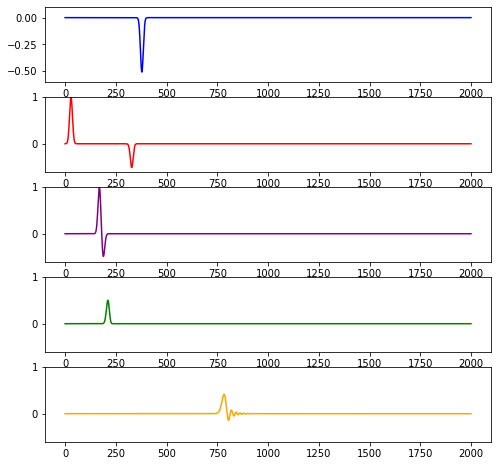

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

#
# const int SRC_POS = 25;
# const int DET_NUM = 5;
# const int DET_POS[DET_NUM] = {0, SRC_POS, SIZE_X/2-1, SIZE_X/2+1, SIZE_X-1};
#


DET_NUM = 5;

f = [open("det._values" + str(i) + ".txt", 'r') for i in range(DET_NUM)]

Ez = [[float(v) for v in f[i]] for i in range(DET_NUM)]
time = range(int(Ez[0][0]))

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(511, ylim = (-0.6, 0.1) )
ax1.plot(time[:], Ez[0][1:], color = 'b')

ax2 = fig.add_subplot(512, ylim = (-0.6, 1))
ax2.plot(time[:], Ez[1][1:], color = 'r')

ax3 = fig.add_subplot(513, ylim = (-0.6, 1))
ax3.plot(time[:], Ez[2][1:], color = 'purple')

ax4 = fig.add_subplot(514, ylim = (-0.6, 1))
ax4.plot(time[:], Ez[3][1:], color = 'g')

ax5 = fig.add_subplot(515, ylim = (-0.6, 1))
ax5.plot(time[:], Ez[4][1:], color = 'orange')

for i in range(DET_NUM):
    f[i].close

<IPython.core.display.Javascript object>


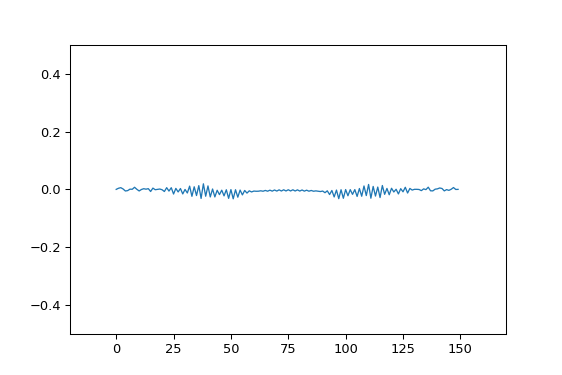

In [28]:
#########/ 1-dimentional animation /###########################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

#########/ data initializing /#################################################
SRC_POS = 100

Ez = []
with open("anim._values.txt", 'r') as f:
    TIME = (int)(f.readline())
    SIZE_X = (int)(f.readline())
    for i in range(TIME):
        Ez.append(list(map(float, f.readline().split(' ')[:-1])))
        
#########/ animation /#########################################################
        
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, xlim=(-20,(SIZE_X+20)), ylim=(-0.5,0.5))


def init():
    Ez_.set_data([], [])
    return Ez_


def redraw(i, Ez, Ez_, SIZE_X):
    Ez_.set_data(range(SIZE_X), Ez[i])
    return Ez_ 


Ez_, = ax.plot([],[], lw=1)
#boundary = ax.plot([SIZE_X/2, SIZE_X/2], [-1.2, 1.2], color='r')]
source, = ax.plot([SRC_POS], [0])

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=TIME,
                               init_func=init,
                               interval=3,
                               blit=True,
                               fargs=(Ez, Ez_, SIZE_X)
                              )
plt.show()